In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

headers = ["Url", "Category","Position", "Title", "Location","Amount_Raised", "Goal", "Number_of_Donators",
           "Length_of_Fundraising", "FB_Shares", "GFM_hearts", "Text", "Latitude", "Longitude"]

df = pd.read_csv('GFM_data.csv', sep = '\t', encoding = 'latin1')


df.head()

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donators,Length_of_Fundraising,FB_Shares,GFM_hearts,Text,Latitude,Longitude
0,0,https://www.gofundme.com/3ctqm-medical-bills-f...,Medical,0,92 Yr old Man Brutally Attacked.,"LOS ANGELES, CA",327345.0,"15,000","12,167",1 month,26k,12k,Rodolfo Rodriguez needs your help today! 92 Yr...,34.052234,-118.243685
1,1,https://www.gofundme.com/olivia-stoy-bone-marr...,Medical,0,Olivia Stoy:Transplant & Liv it up!,"ASHLEY, IN",316261.0,1.0M,"5,598",3 months,12k,5.7k,Thomas Stoy needs your help today! Olivia Stoy...,41.527272,-85.065523
2,2,https://www.gofundme.com/autologous-Tcell-Tran...,Medical,1,AUTOLOGOUS T CELL TRANSPLANT,"STATEN ISLAND, NY",241125.0,"250,000",841,2 months,1.8k,836,Philip Defonte needs your help today! AUTOLOGO...,40.579532,-74.150201
3,3,https://www.gofundme.com/a-chance-of-rebirth,Medical,1,A chance of rebirth,"DUBLIN, CA",237424.0,"225,000","4,708",1 month,9.7k,4.7k,Sriram Kanniah needs your help today! A chance...,37.702152,-121.935792
4,4,https://www.gofundme.com/teamclaire,Medical,1,Claire Wineland Needs Our Help,"GARDEN GROVE, CA",236590.0,"225,000","8,393",2 months,6.4k,8.9k,Melissa Yeager needs your help today! Claire W...,33.774269,-117.937995


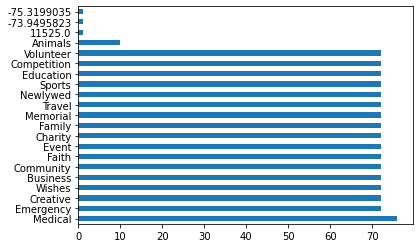

In [3]:
df['Category'].value_counts().plot(kind='barh')

In [15]:
## helper function to clean the number of donations. Essentially what this helper function does is strip commas from a string so that we can type cast the column ##
#Note ** can be put into one lambda function
def helper(x):
    if isinstance(x,str):
        x =  x.replace(',','')
        if x.isnumeric()==False:
            return np.NaN
        return x
    else:
        return x
df['Number_of_Donators'] = df['Number_of_Donators'].apply(lambda x: helper(x)).astype(float)

## helper function to clean goal column. Essentially what this function does is replace things like 6.1M to 6100000 so that we can type cast the columns  ##
def helper_two(x):
    if isinstance(x,str):
        x = x.replace(',','')
        if '.' in x and 'M' in x:
            x = x.replace('.','')
            x = x.replace('M','00000')
        return x
    else:
        return x
df['Goal'] = df['Goal'].apply(lambda x: helper_two(x)).astype(float)

## helper function to clean FB SHARES and GFM column. Essentially what this function does is replace things like 6.1k to 6100 so that we can type cast the columns  ##
def helper_three(x):
    if isinstance(x,str):
        x = x.replace(',','')
        if '.' in x and 'k' in x:
            x = x.replace('.','')
            x = x.replace('k','00')
        if 'k' in x:
            x = x.replace('k','000')
        return x
    else:
        return x
df['FB_Shares'] = df['FB_Shares'].apply(lambda x: helper_three(x)).astype(float)
df['GFM_hearts'] = df['GFM_hearts'].apply(lambda x: helper_three(x)).astype(float)

In [16]:
df

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donators,Length_of_Fundraising,FB_Shares,GFM_hearts,Text,Latitude,Longitude
0,0,https://www.gofundme.com/3ctqm-medical-bills-f...,Medical,0,92 Yr old Man Brutally Attacked.,"LOS ANGELES, CA",327345.0,15000.0,12167.0,1 month,26000.0,12000.0,Rodolfo Rodriguez needs your help today! 92 Yr...,34.052234,-118.243685
1,1,https://www.gofundme.com/olivia-stoy-bone-marr...,Medical,0,Olivia Stoy:Transplant & Liv it up!,"ASHLEY, IN",316261.0,1000000.0,5598.0,3 months,12000.0,5700.0,Thomas Stoy needs your help today! Olivia Stoy...,41.527272,-85.065523
2,2,https://www.gofundme.com/autologous-Tcell-Tran...,Medical,1,AUTOLOGOUS T CELL TRANSPLANT,"STATEN ISLAND, NY",241125.0,250000.0,841.0,2 months,1800.0,836.0,Philip Defonte needs your help today! AUTOLOGO...,40.579532,-74.150201
3,3,https://www.gofundme.com/a-chance-of-rebirth,Medical,1,A chance of rebirth,"DUBLIN, CA",237424.0,225000.0,4708.0,1 month,9700.0,4700.0,Sriram Kanniah needs your help today! A chance...,37.702152,-121.935792
4,4,https://www.gofundme.com/teamclaire,Medical,1,Claire Wineland Needs Our Help,"GARDEN GROVE, CA",236590.0,225000.0,8393.0,2 months,6400.0,8900.0,Melissa Yeager needs your help today! Claire W...,33.774269,-117.937995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,1237,https://www.gofundme.com/help-send-michelle-to...,Wishes,22,Help Send Michelle to Israel!,"DELL RAPIDS, SD",10370.0,8000.0,103.0,5 months,398.0,106.0,Michelle Serlet needs your help today! Help Se...,43.826084,-96.706161
1238,1238,https://www.gofundme.com/support-alvins-family,Wishes,22,Support AlvinÃ¢ÂÂs Family,"MONROE, GA",10349.0,15000.0,185.0,1 month,977.0,194.0,Kalvin Ahmed needs your help today! Support Al...,33.794836,-83.713229
1239,1239,https://www.gofundme.com/nuclear-medicine-tech...,Wishes,23,College & Medical expenses,"DALLAS, TX",10330.0,50000.0,9.0,27 days,66.0,11.0,Anjelica Vossler needs your help today! Colleg...,32.776664,-96.796988
1240,1240,https://www.gofundme.com/girls-junior-national...,Wishes,23,Rhonda's Wish,"San Antonio TX 78218, US",10265.0,15000.0,109.0,3 months,476.0,114.0,Anesi Maverick Tuufuli needs your help today! ...,29.489578,-98.385532


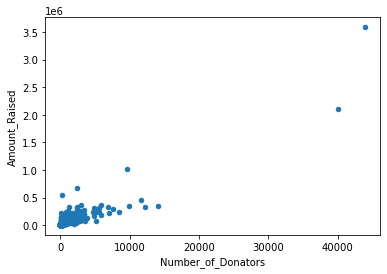

In [7]:
df.plot(kind='scatter', x ='Number_of_Donators', y = 'Amount_Raised')

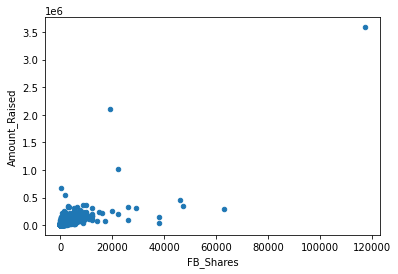

In [11]:
df.plot(kind='scatter', x='FB_Shares', y='Amount_Raised')

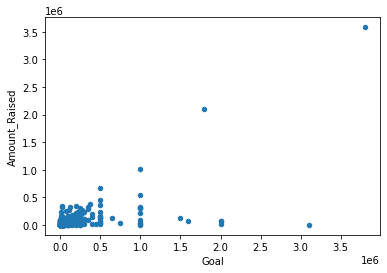

In [17]:
df.plot(kind='scatter', x='Goal', y='Amount_Raised')

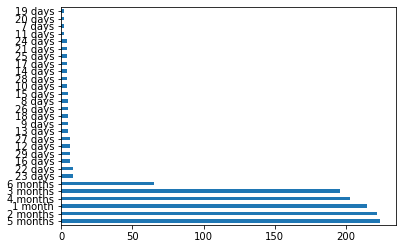

In [43]:
df['Length_of_Fundraising'].value_counts().plot(kind='barh')